In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
df=pd.read_csv('dataset.csv',sep=',',header=None)

In [3]:
df

,0,1
0,76.954460,10.881760
1,76.962920,10.859130
2,76.968980,10.865150
3,76.974120,10.867120
4,76.973840,10.869670
...,...,...
2908,79.131900,12.921410
2909,79.129570,12.921030
2910,76.721080,8.082150
2911,80.320300,13.214610


In [4]:
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

In [5]:
df = normalize(df)
c1,coph=cophenet(linkage(df, 'single'),pdist(df))
c2,coph=cophenet(linkage(df, 'complete'),pdist(df))
c3,coph=cophenet(linkage(df, 'average'),pdist(df))
c4,coph=cophenet(linkage(df, 'weighted'),pdist(df))
c5,coph=cophenet(linkage(df, 'centroid'),pdist(df))
linkage=pd.DataFrame({"Linkage":['Single','Complete','Average','Weighted','Centroid'],
                    "Cophenet Coeff":[c1,c2,c3,c4,c5]})
linkage

,Linkage,Cophenet Coeff
0,Single,0.902287
1,Complete,0.899687
2,Average,0.954197
3,Weighted,0.944419
4,Centroid,0.954197


In [7]:
    df=pd.read_csv('Downloads/Telegram Desktop/dataset.csv',sep=',',header=None)
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import silhouette_score
    db_index=[]
    for i in range(2,8):
        db_index.append(silhouette_score(df, AgglomerativeClustering(n_clusters=i,linkage='average',affinity='manhattan').fit(df).labels_))
    db_index = pd.DataFrame({'K Values':['2','3','4','5','6','7'],
                             'Silhouette index':db_index})
    print(db_index)
    print('K value 2 is giving the optimum')

  K Values  Silhouette index
0        2          0.975861
1        3          0.717708
2        4          0.761593
3        5          0.809102
4        6          0.803519
5        7          0.854616
K value 2 is giving the optimum


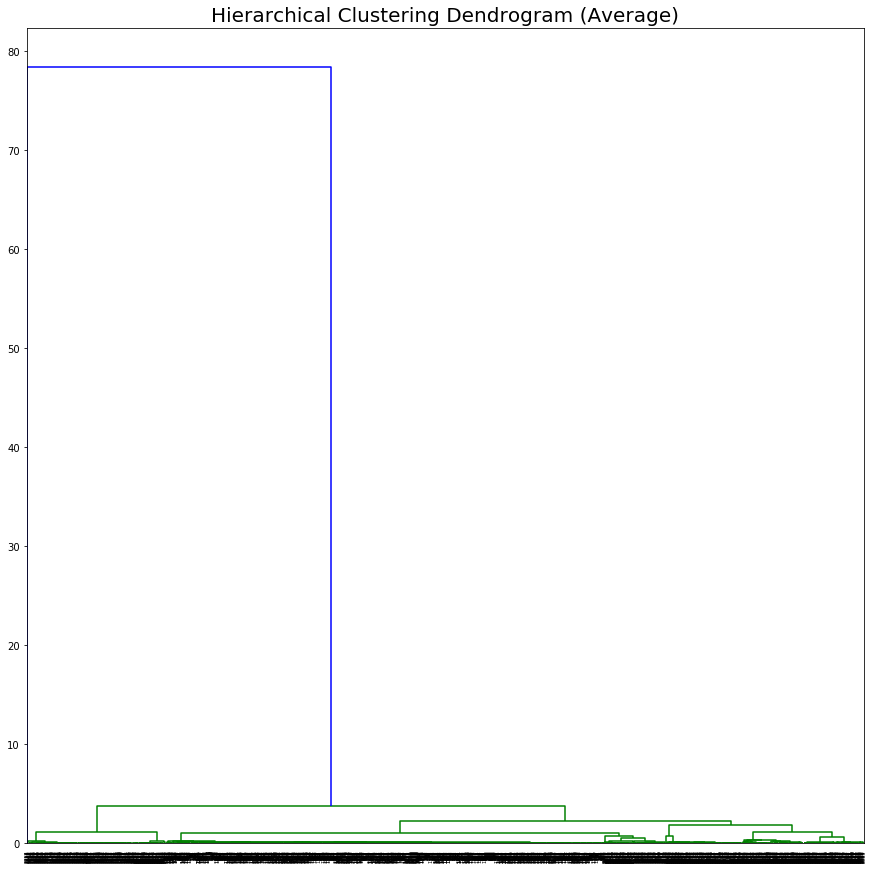

In [8]:
linked = linkage(df, 'average')
plt.figure(figsize=(15, 15))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Average)', fontsize=20)
plt.show()

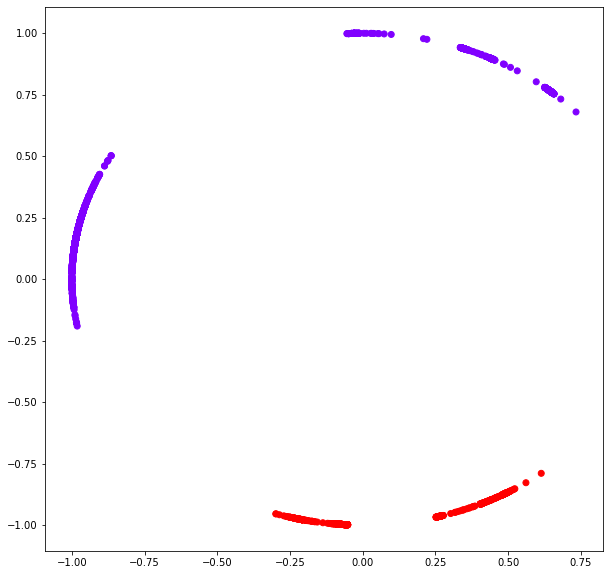

In [29]:
df=pd.read_csv('Downloads/Telegram Desktop/dataset.csv',sep=',',header=None)
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized) 
ac2 = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='euclidean')
plt.figure(figsize =(10, 10)) 
plt.scatter(X_normalized[0], X_normalized[1],  
           c = ac2.fit_predict(X_normalized), cmap ='rainbow') 